In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean,inf,arange
from numpy import std,var
from pandas import read_csv
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
scaler = StandardScaler()

In [ ]:
df = pd.read_csv('../../../data/dataset.csv')

In [ ]:
def get_new_target(col):
    return 1 if col == 'V' else 0

In [ ]:
df['new_target'] = df['liverpool_result_ft'].apply(get_new_target)

In [ ]:
y = df['liverpool_result_ft']

In [ ]:
y_new = df['new_target']

In [ ]:
x = df.drop(columns=['liverpool_result_ft','new_target'])

In [ ]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.3)

# Random Forest

## Trees Number

In [ ]:
model = RandomForestClassifier()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.580 (0.041)


In [ ]:
params = {'n_estimators' : np.linspace(10,200,10).astype(int), 
         
        }

In [ ]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                      

In [ ]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

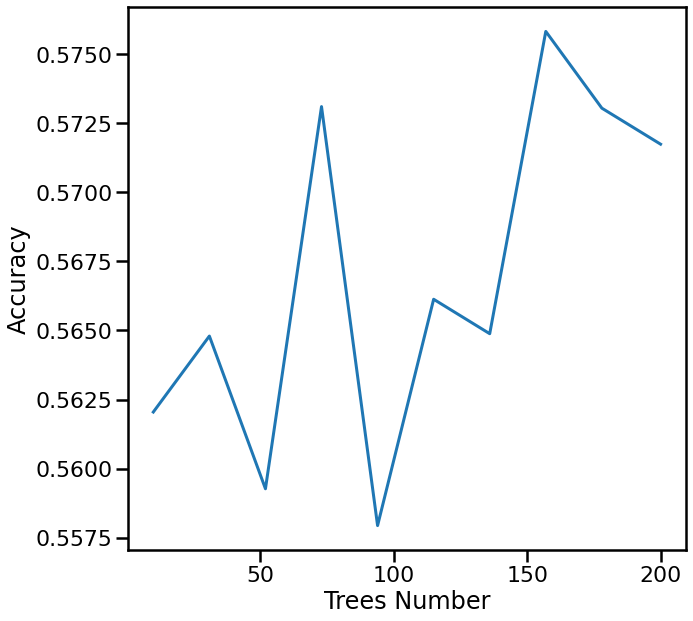

In [ ]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_n_estimators', y='mean_test_score',data=res,markers='o')
plt.xlabel('Trees Number')
plt.ylabel('Accuracy')

In [ ]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
7,0.424852,0.013362,0.027127,0.003065,157,{'n_estimators': 157},0.510204,0.551020,0.458333,0.666667,0.583333,0.591837,0.612245,0.604167,0.562500,0.541667,0.571429,0.571429,0.604167,0.604167,0.604167,0.575822,0.047055,1
3,0.196522,0.006619,0.012903,0.000494,73,{'n_estimators': 73},0.510204,0.510204,0.583333,0.666667,0.645833,0.591837,0.591837,0.625000,0.541667,0.500000,0.612245,0.551020,0.583333,0.583333,0.500000,0.573101,0.051226,2
8,0.474690,0.006358,0.030135,0.002202,178,{'n_estimators': 178},0.551020,0.510204,0.583333,0.687500,0.562500,0.591837,0.612245,0.604167,0.562500,0.500000,0.571429,0.571429,0.604167,0.583333,0.500000,0.573044,0.046527,3


In [ ]:
model_1 = search.best_estimator_

In [ ]:
model_pred_1 = model_1.predict(x_test)

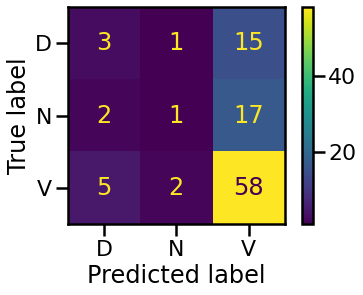

In [ ]:
plot_confusion_matrix(model_1,x_test,y_test)

In [ ]:
accuracy_score(y_test,model_pred_1)

0.5961538461538461

In [ ]:
print(classification_report(y_test,model_pred_1))

              precision    recall  f1-score   support

           D       0.30      0.16      0.21        19
           N       0.25      0.05      0.08        20
           V       0.64      0.89      0.75        65

    accuracy                           0.60       104
   macro avg       0.40      0.37      0.35       104
weighted avg       0.51      0.60      0.52       104



## Depth

In [ ]:
model = RandomForestClassifier(n_estimators=94)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.573 (0.020)


In [ ]:
params = {'max_depth' : np.linspace(3,30,10).astype(int)
        }

In [ ]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=94, n_jobs=None,
                                       

In [ ]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

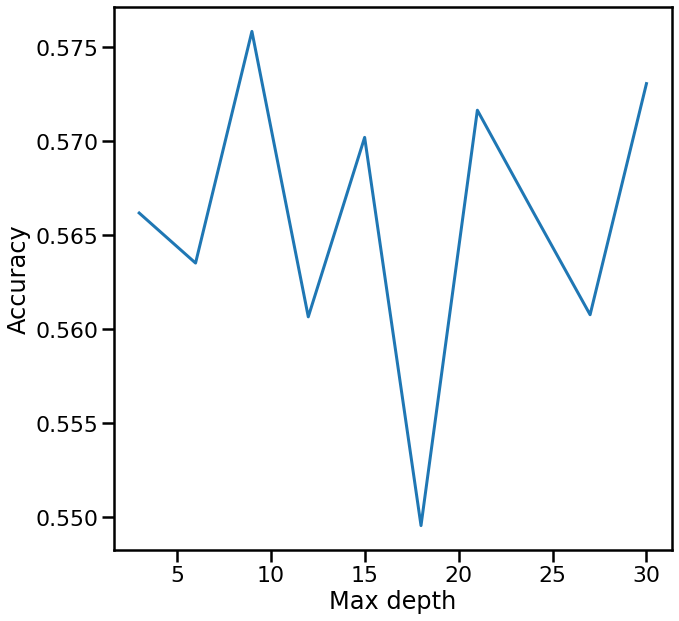

In [ ]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_max_depth', y='mean_test_score',data=res,markers='o')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [ ]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
2,0.252747,0.005228,0.017077,0.002125,9,{'max_depth': 9},0.551020,0.489796,0.562500,0.625000,0.625000,0.612245,0.612245,0.604167,0.520833,0.541667,0.571429,0.551020,0.604167,0.645833,0.520833,0.575850,0.044751,1
9,0.249860,0.019546,0.016888,0.005937,30,{'max_depth': 30},0.530612,0.510204,0.562500,0.625000,0.583333,0.571429,0.612245,0.645833,0.541667,0.541667,0.591837,0.571429,0.604167,0.562500,0.541667,0.573073,0.036417,2
6,0.254560,0.006710,0.018331,0.002080,21,{'max_depth': 21},0.489796,0.530612,0.583333,0.645833,0.562500,0.591837,0.632653,0.583333,0.520833,0.520833,0.612245,0.551020,0.645833,0.625000,0.479167,0.571655,0.053238,3


In [ ]:
model_2 = search.best_estimator_

In [ ]:
model_pred_2 = model_2.predict(x_test)

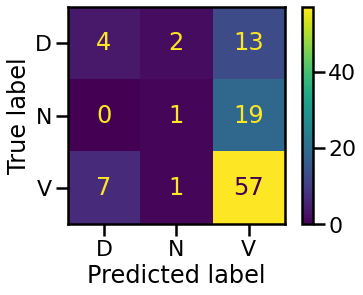

In [ ]:
plot_confusion_matrix(model_2,x_test,y_test)

In [ ]:
accuracy_score(y_test,model_pred_2)

0.5961538461538461

In [ ]:
print(classification_report(y_test,model_pred_2))

              precision    recall  f1-score   support

           D       0.36      0.21      0.27        19
           N       0.25      0.05      0.08        20
           V       0.64      0.88      0.74        65

    accuracy                           0.60       104
   macro avg       0.42      0.38      0.36       104
weighted avg       0.51      0.60      0.53       104



## Split Node

In [ ]:
model = RandomForestClassifier(n_estimators=94,max_depth=6)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.601 (0.020)


In [ ]:
params = {
        
         'min_samples_split':np.linspace(1,10,10).astype(int),
         
        }

In [ ]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=94, n_jobs=None,
                                          

In [ ]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

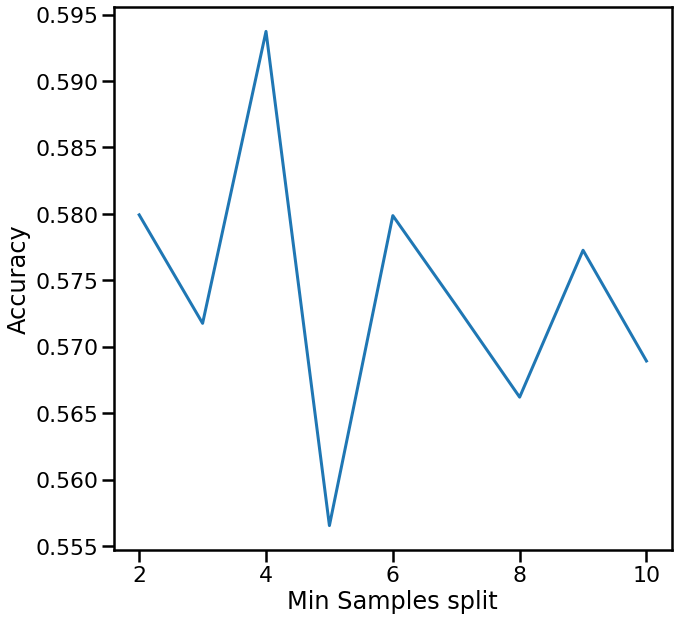

In [ ]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_min_samples_split', y='mean_test_score',data=res,markers='o')
plt.xlabel('Min Samples split')
plt.ylabel('Accuracy')

In [ ]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
3,0.248152,0.012694,0.016515,0.001590,4,{'min_samples_split': 4},0.551020,0.510204,0.562500,0.645833,0.625000,0.612245,0.591837,0.625000,0.562500,0.583333,0.693878,0.551020,0.625000,0.583333,0.583333,0.593736,0.043912,1
1,0.245343,0.007726,0.016608,0.002101,2,{'min_samples_split': 2},0.489796,0.551020,0.541667,0.666667,0.604167,0.632653,0.571429,0.645833,0.541667,0.604167,0.632653,0.571429,0.583333,0.562500,0.500000,0.579932,0.049892,2
5,0.241445,0.006920,0.016057,0.000674,6,{'min_samples_split': 6},0.571429,0.510204,0.583333,0.645833,0.562500,0.632653,0.591837,0.604167,0.541667,0.562500,0.612245,0.571429,0.562500,0.604167,0.541667,0.579875,0.034968,3


In [ ]:
model_3 = search.best_estimator_

In [ ]:
model_pred_3 = model_1.predict(x_test)

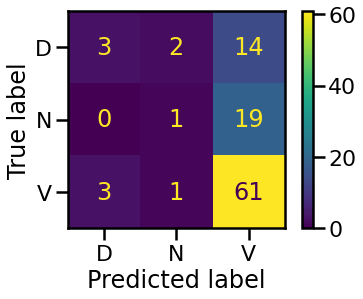

In [ ]:
plot_confusion_matrix(model_3,x_test,y_test)

In [ ]:
accuracy_score(y_test,model_pred_3)

0.5961538461538461

In [ ]:
print(classification_report(y_test,model_pred_3))

              precision    recall  f1-score   support

           D       0.30      0.16      0.21        19
           N       0.25      0.05      0.08        20
           V       0.64      0.89      0.75        65

    accuracy                           0.60       104
   macro avg       0.40      0.37      0.35       104
weighted avg       0.51      0.60      0.52       104



## Sample Leaf

In [ ]:
model = RandomForestClassifier(n_estimators=94,max_depth=6,min_samples_split=3)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: nan (nan)


In [ ]:
params = {
        
         'min_samples_leaf':np.linspace(1,10,10).astype(int),
         
        }

In [ ]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=6,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=3,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=94, n_jobs=None,
                          

In [ ]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

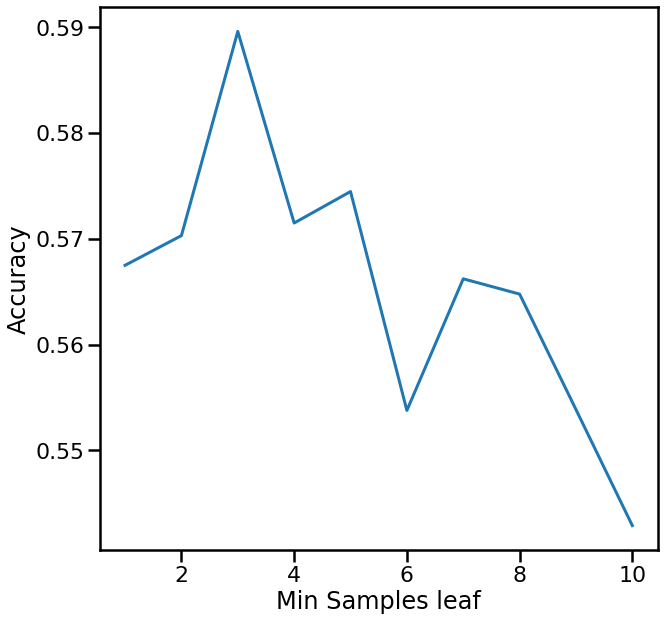

In [ ]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_min_samples_leaf', y='mean_test_score',data=res,markers='o')
plt.xlabel('Min Samples leaf')
plt.ylabel('Accuracy')

In [ ]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
2,0.292978,0.013291,0.015957,0.000648,3,{'min_samples_leaf': 3},0.571429,0.530612,0.583333,0.645833,0.562500,0.612245,0.571429,0.645833,0.583333,0.583333,0.673469,0.530612,0.625000,0.625000,0.500000,0.589598,0.046817,1
4,0.291812,0.007285,0.015848,0.000645,5,{'min_samples_leaf': 5},0.530612,0.489796,0.541667,0.666667,0.500000,0.591837,0.612245,0.625000,0.520833,0.562500,0.612245,0.551020,0.687500,0.625000,0.500000,0.574461,0.060205,2
3,0.292327,0.008577,0.016480,0.001743,4,{'min_samples_leaf': 4},0.530612,0.571429,0.500000,0.604167,0.541667,0.632653,0.612245,0.583333,0.604167,0.520833,0.612245,0.571429,0.604167,0.604167,0.479167,0.571485,0.044896,3


In [ ]:
model_4 = search.best_estimator_

In [ ]:
model_pred_4 = model_4.predict(x_test)

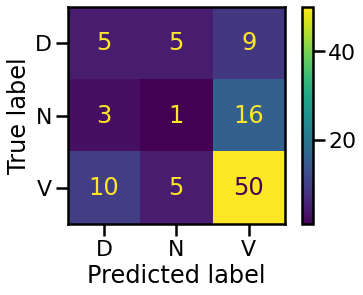

In [ ]:
plot_confusion_matrix(model_4,x_test,y_test)

In [ ]:
accuracy_score(y_test,model_pred_4)

0.5384615384615384

In [ ]:
print(classification_report(y_test,model_pred_4))

              precision    recall  f1-score   support

           D       0.30      0.16      0.21        19
           N       1.00      0.05      0.10        20
           V       0.62      0.89      0.73        65

    accuracy                           0.60       104
   macro avg       0.64      0.37      0.35       104
weighted avg       0.64      0.60      0.51       104



# Extra Trees

## Trees Number

In [ ]:
model = ExtraTreesClassifier()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.607 (0.033)


In [ ]:
params = {'n_estimators' : np.linspace(10,200,10).astype(int), 
         
        }

In [ ]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                         

In [ ]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

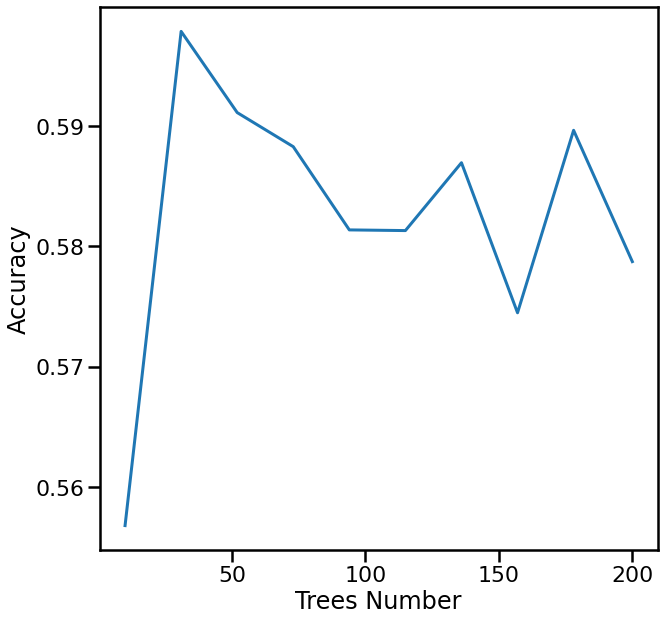

In [ ]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_n_estimators', y='mean_test_score',data=res,markers='o')
plt.xlabel('Trees Number (XT)')
plt.ylabel('Accuracy')

In [ ]:
res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
1,0.065051,0.009732,0.007046,0.000429,31,{'n_estimators': 31},0.591837,0.591837,0.645833,0.645833,0.583333,0.571429,0.530612,0.541667,0.562500,0.583333,0.673469,0.571429,0.583333,0.666667,0.625000,0.597874,0.042288,1
2,0.100841,0.005387,0.010098,0.000175,52,{'n_estimators': 52},0.510204,0.530612,0.687500,0.645833,0.583333,0.551020,0.591837,0.541667,0.583333,0.562500,0.591837,0.612245,0.583333,0.708333,0.583333,0.591128,0.052784,2
8,0.334680,0.005378,0.029565,0.000837,178,{'n_estimators': 178},0.571429,0.530612,0.604167,0.604167,0.583333,0.551020,0.591837,0.604167,0.604167,0.604167,0.591837,0.612245,0.583333,0.645833,0.562500,0.589654,0.026903,3
3,0.141879,0.007031,0.013971,0.000612,73,{'n_estimators': 73},0.530612,0.530612,0.604167,0.625000,0.625000,0.571429,0.510204,0.562500,0.604167,0.625000,0.673469,0.612245,0.583333,0.666667,0.500000,0.588294,0.051665,4
6,0.258994,0.004901,0.024128,0.003393,136,{'n_estimators': 136},0.510204,0.551020,0.645833,0.666667,0.583333,0.551020,0.571429,0.562500,0.583333,0.625000,0.551020,0.653061,0.541667,0.645833,0.562500,0.586961,0.046464,5


In [ ]:
model_1 = search.best_estimator_

In [ ]:
model_pred_1 = model_1.predict(x_test)

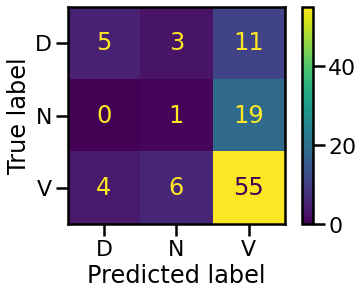

In [ ]:
plot_confusion_matrix(model_1,x_test,y_test)

In [ ]:
accuracy_score(y_test,model_pred_1)

0.5865384615384616

In [ ]:
print(classification_report(y_test,model_pred_1))

              precision    recall  f1-score   support

           D       0.56      0.26      0.36        19
           N       0.10      0.05      0.07        20
           V       0.65      0.85      0.73        65

    accuracy                           0.59       104
   macro avg       0.43      0.39      0.39       104
weighted avg       0.53      0.59      0.54       104



## Depth

In [ ]:
model = ExtraTreesClassifier(n_estimators=94)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.610 (0.039)


In [ ]:
params = {'max_depth' : np.linspace(3,30,10).astype(int)
        }

In [ ]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=94, n_jobs=None,
                                            oob_score=False, random_state=None,
                          

In [ ]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

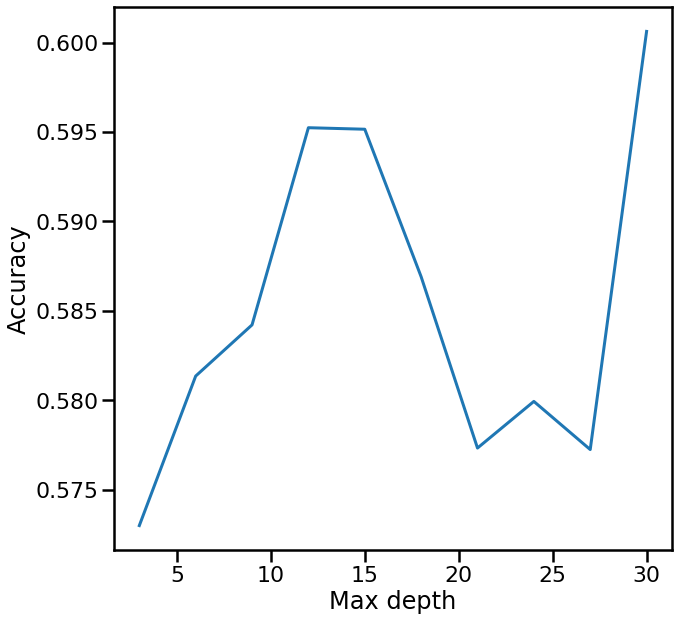

In [ ]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_max_depth', y='mean_test_score',data=res,markers='o')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [ ]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
9,0.176958,0.012200,0.016198,0.002010,30,{'max_depth': 30},0.530612,0.591837,0.625000,0.666667,0.583333,0.571429,0.571429,0.562500,0.666667,0.645833,0.653061,0.632653,0.562500,0.666667,0.479167,0.600624,0.054246,1
3,0.179167,0.007645,0.017495,0.003926,12,{'max_depth': 12},0.510204,0.489796,0.604167,0.666667,0.687500,0.551020,0.591837,0.604167,0.562500,0.604167,0.673469,0.612245,0.562500,0.645833,0.562500,0.595238,0.055590,2
4,0.178009,0.003371,0.016752,0.000362,15,{'max_depth': 15},0.571429,0.551020,0.666667,0.666667,0.604167,0.571429,0.612245,0.604167,0.541667,0.604167,0.612245,0.571429,0.583333,0.666667,0.500000,0.595153,0.046088,3


In [ ]:
model_2 = search.best_estimator_

In [ ]:
model_pred_2 = model_2.predict(x_test)

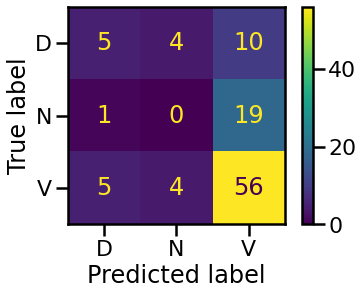

In [ ]:
plot_confusion_matrix(model_2,x_test,y_test)

In [ ]:
accuracy_score(y_test,model_pred_2)

0.5865384615384616

In [ ]:
print(classification_report(y_test,model_pred_2))

              precision    recall  f1-score   support

           D       0.45      0.26      0.33        19
           N       0.00      0.00      0.00        20
           V       0.66      0.86      0.75        65

    accuracy                           0.59       104
   macro avg       0.37      0.37      0.36       104
weighted avg       0.49      0.59      0.53       104



## Split Node

In [ ]:
model = ExtraTreesClassifier(n_estimators=94,max_depth=9)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.600 (0.025)


In [ ]:
params = {
        
         'min_samples_split':np.linspace(1,10,10).astype(int),
         
        }

In [ ]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=9, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=94, n_jobs=None,
                                            oob_score=False, random_state=None,
                             

In [ ]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

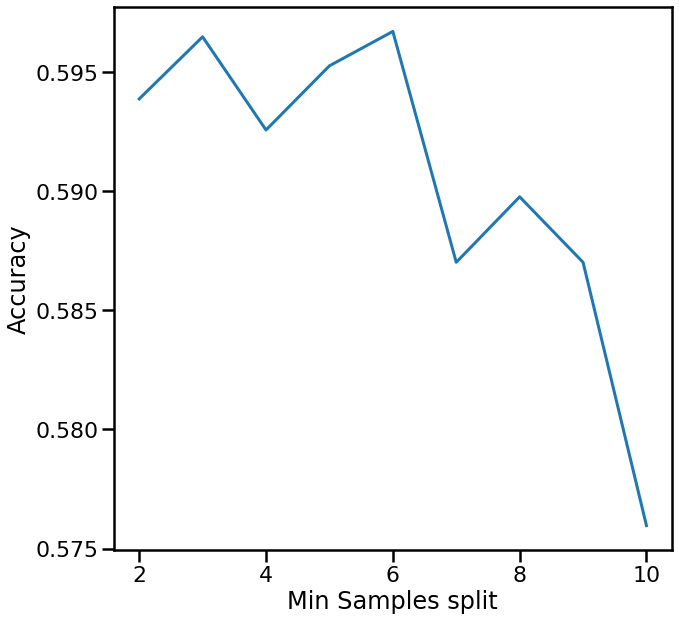

In [ ]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_min_samples_split', y='mean_test_score',data=res,markers='o')
plt.xlabel('Min Samples split')
plt.ylabel('Accuracy')

In [ ]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
5,0.169911,0.004781,0.017748,0.001444,6,{'min_samples_split': 6},0.55102,0.510204,0.666667,0.666667,0.604167,0.612245,0.571429,0.583333,0.666667,0.562500,0.551020,0.571429,0.604167,0.645833,0.583333,0.596712,0.046125,1
2,0.172441,0.008213,0.016765,0.000647,3,{'min_samples_split': 3},0.55102,0.530612,0.645833,0.645833,0.604167,0.612245,0.571429,0.604167,0.562500,0.604167,0.653061,0.612245,0.604167,0.625000,0.520833,0.596485,0.039606,2
4,0.169647,0.005161,0.016608,0.000865,5,{'min_samples_split': 5},0.55102,0.551020,0.666667,0.645833,0.625000,0.571429,0.591837,0.604167,0.604167,0.562500,0.591837,0.551020,0.583333,0.645833,0.583333,0.595266,0.035663,3


In [ ]:
model_3 = search.best_estimator_

In [ ]:
model_pred_3 = model_3.predict(x_test)

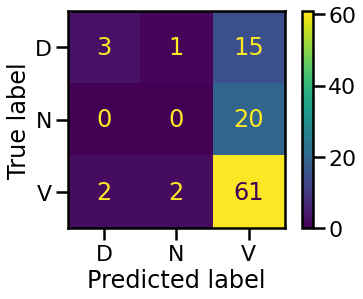

In [ ]:
plot_confusion_matrix(model_3,x_test,y_test)

In [ ]:
accuracy_score(y_test,model_pred_3)

0.6153846153846154

In [ ]:
print(classification_report(y_test,model_pred_3))

              precision    recall  f1-score   support

           D       0.60      0.16      0.25        19
           N       0.00      0.00      0.00        20
           V       0.64      0.94      0.76        65

    accuracy                           0.62       104
   macro avg       0.41      0.37      0.34       104
weighted avg       0.51      0.62      0.52       104



## Sample Leaf

In [ ]:
model = ExtraTreesClassifier(n_estimators=94,max_depth=6,min_samples_split=2)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.552 (0.071)


In [ ]:
params = {
        
         'min_samples_leaf':np.linspace(1,10,10).astype(int),
         
        }

In [ ]:
search = GridSearchCV(model, params, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
search.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=6, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=94, n_jobs=None,
                                            oob_score=False, random_state=None,
                             

In [ ]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

Text(0, 0.5, 'Accuracy')

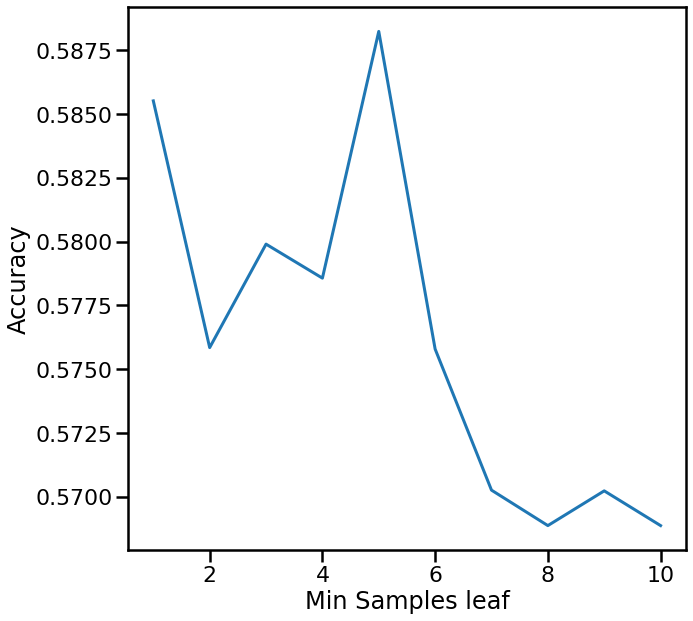

In [ ]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_min_samples_leaf', y='mean_test_score',data=res,markers='o')
plt.xlabel('Min Samples leaf')
plt.ylabel('Accuracy')

In [ ]:
res.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
4,0.163412,0.005288,0.015963,0.000340,5,{'min_samples_leaf': 5},0.612245,0.571429,0.604167,0.583333,0.604167,0.591837,0.551020,0.604167,0.562500,0.583333,0.571429,0.571429,0.604167,0.604167,0.604167,0.588237,0.018358,1
0,0.170827,0.007562,0.017466,0.002116,1,{'min_samples_leaf': 1},0.551020,0.551020,0.583333,0.583333,0.562500,0.632653,0.530612,0.604167,0.604167,0.604167,0.591837,0.571429,0.625000,0.645833,0.541667,0.585516,0.033224,2
2,0.166957,0.010381,0.016233,0.000764,3,{'min_samples_leaf': 3},0.551020,0.571429,0.625000,0.562500,0.562500,0.591837,0.571429,0.583333,0.562500,0.583333,0.612245,0.571429,0.583333,0.604167,0.562500,0.579904,0.020178,3


In [ ]:
model_4 = search.best_estimator_

In [ ]:
model_pred_4 = model_4.predict(x_test)

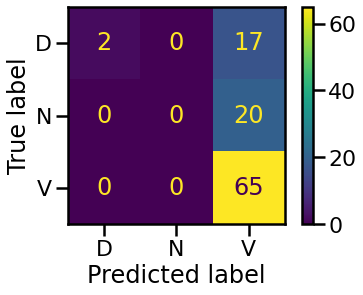

In [ ]:
plot_confusion_matrix(model_4,x_test,y_test)

In [ ]:
accuracy_score(y_test,model_pred_4)

0.6442307692307693

In [ ]:
print(classification_report(y_test,model_pred_4))

              precision    recall  f1-score   support

           D       1.00      0.11      0.19        19
           N       0.00      0.00      0.00        20
           V       0.64      1.00      0.78        65

    accuracy                           0.64       104
   macro avg       0.55      0.37      0.32       104
weighted avg       0.58      0.64      0.52       104



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
j = 0
for i in range(len(x_train.columns)):
  print(f'{x_train.columns[i]} : {model_4.feature_importances_[i]}')
  j+= model_4.feature_importances_[i]
print(j)

Shots : 0.11885464177632536
Saves : 0.0403697740103374
Crosses : 0.07259531210847397
Fouls : 0.05924859233203427
Offsides : 0.04057515344771731
Corners : 0.06371023449567365
Yellow Card : 0.049295437387303166
Red Cards : 0.005388937727817298
Passes : 0.08896890816992063
Interceptions : 0.06016516413930162
Blocks : 0.10305587943397734
Catches : 0.03383155285038723
Tackles : 0.04669159382207497
Rest_Days : 0.041392444015426834
Elo_Diff : 0.13098522987810832
home_0_away_1 : 0.04487114440512054
0.9999999999999999


In [ ]:
pd.DataFrame({'col' : x_train.columns,'importance':model_4.feature_importances_}).sort_values('importance')

,col,importance
7,Red Cards,0.005389
11,Catches,0.033832
1,Saves,0.040370
4,Offsides,0.040575
13,Rest_Days,0.041392
15,home_0_away_1,0.044871
12,Tackles,0.046692
6,Yellow Card,0.049295
3,Fouls,0.059249
9,Interceptions,0.060165
